
### Importing Libraries 




In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


sns.set()

### Data reading

In [27]:
raw_data=pd.read_csv('cc.csv')
raw_data.head()

,column_a,time,v1,v2,v3,v4,v5,v6,v7,v8,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,1,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,False
1,2,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,False
2,3,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,False
3,4,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,False
4,5,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,False


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   column_a  284807 non-null  int64  
 1   time      284807 non-null  int64  
 2   v1        284807 non-null  float64
 3   v2        284807 non-null  float64
 4   v3        284807 non-null  float64
 5   v4        284807 non-null  float64
 6   v5        284807 non-null  float64
 7   v6        284807 non-null  float64
 8   v7        284807 non-null  float64
 9   v8        284807 non-null  float64
 10  v9        284807 non-null  float64
 11  v10       284807 non-null  float64
 12  v11       284807 non-null  float64
 13  v12       284807 non-null  float64
 14  v13       284807 non-null  float64
 15  v14       284807 non-null  float64
 16  v15       284807 non-null  float64
 17  v16       284807 non-null  float64
 18  v17       284807 non-null  float64
 19  v18       284807 non-null  float64
 20  v19 

In [5]:
print(raw_data.shape)
raw_data.describe()

(284807, 32)


,column_a,time,v1,v2,v3,v4,v5,v6,v7,v8,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,142404.000000,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,...,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619
std,82216.843396,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,1.000000,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,71202.500000,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,142404.000000,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,213605.500000,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,284807.000000,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [5]:
#Looking up for missing data
raw_data.isnull().sum()

column_a    0
time        0
v1          0
v2          0
v3          0
v4          0
v5          0
v6          0
v7          0
v8          0
v9          0
v10         0
v11         0
v12         0
v13         0
v14         0
v15         0
v16         0
v17         0
v18         0
v19         0
v20         0
v21         0
v22         0
v23         0
v24         0
v25         0
v26         0
v27         0
v28         0
amount      0
class       0
dtype: int64

In [28]:
# Read the dataset
raw_data = pd.read_csv('cc.csv')

# Change the false and true values to 0 and 1
for column in raw_data.columns:
    if raw_data[column].dtype == 'bool':
        raw_data[column] = raw_data[column].replace([False, True], [0, 1])

# Write the updated dataset to a new CSV file
raw_data.to_csv('cc_updated.csv', index=False)


In [7]:
raw_data

,column_a,time,v1,v2,v3,v4,v5,v6,v7,v8,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,1,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,3,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,4,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,5,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,284803,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,284804,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,284805,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,284806,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [29]:
Total_count = raw_data['class'].value_counts()
print("Percernt of Frauds on data: %f" % (Total_count[1]*100/Total_count.sum()))
print("Total sum of frauds: %f" % (Total_count[1]))
print("Percernt of Non Frauds on data: %f" % (Total_count[0]*100/Total_count.sum()))
print("Total sum of Non frauds: %f" % (Total_count[0]))

Percernt of Frauds on data: 0.172749
Total sum of frauds: 492.000000
Percernt of Non Frauds on data: 99.827251
Total sum of Non frauds: 284315.000000


###  Label check and visualization

In [30]:
def boxplot_columns(df):
    for i in range(2,(len(df.columns)+2),2):
            f , ax = plt.subplots(1,2, figsize=(12,2))
            sns.boxplot(x=df[df.columns[i-2]], ax=ax[0])
            sns.boxplot(x=df[df.columns[i-1]], ax=ax[1])
        
def histplots(df):
    fig, ax = plt.subplots(2,2, figsize=(20,8))

    Val_Fraud = df['time'][df['class'] == 1]
    Val_nFraud = df['amount'][df['class'] == 0]

    sns.histplot(data=df, x='time', ax=ax[0,0])

    sns.histplot(data=df, x='amount', ax=ax[0,1])

    sns.histplot(Val_Fraud, ax=ax[1,0])

    sns.histplot(Val_nFraud, ax=ax[1,1])

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: amount, dtype: float64
Amount Skewness 16.977724


<AxesSubplot:xlabel='amount', ylabel='Count'>

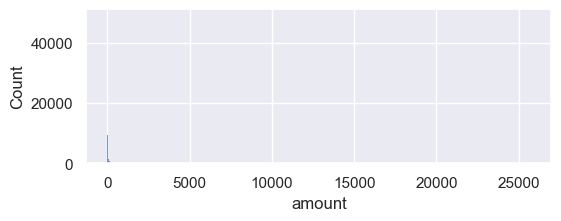

In [10]:
print(raw_data['amount'].describe())
print("Amount Skewness %f" % raw_data['amount'].skew())
plt.figure(figsize=(6, 2))
sns.histplot(raw_data['amount'])

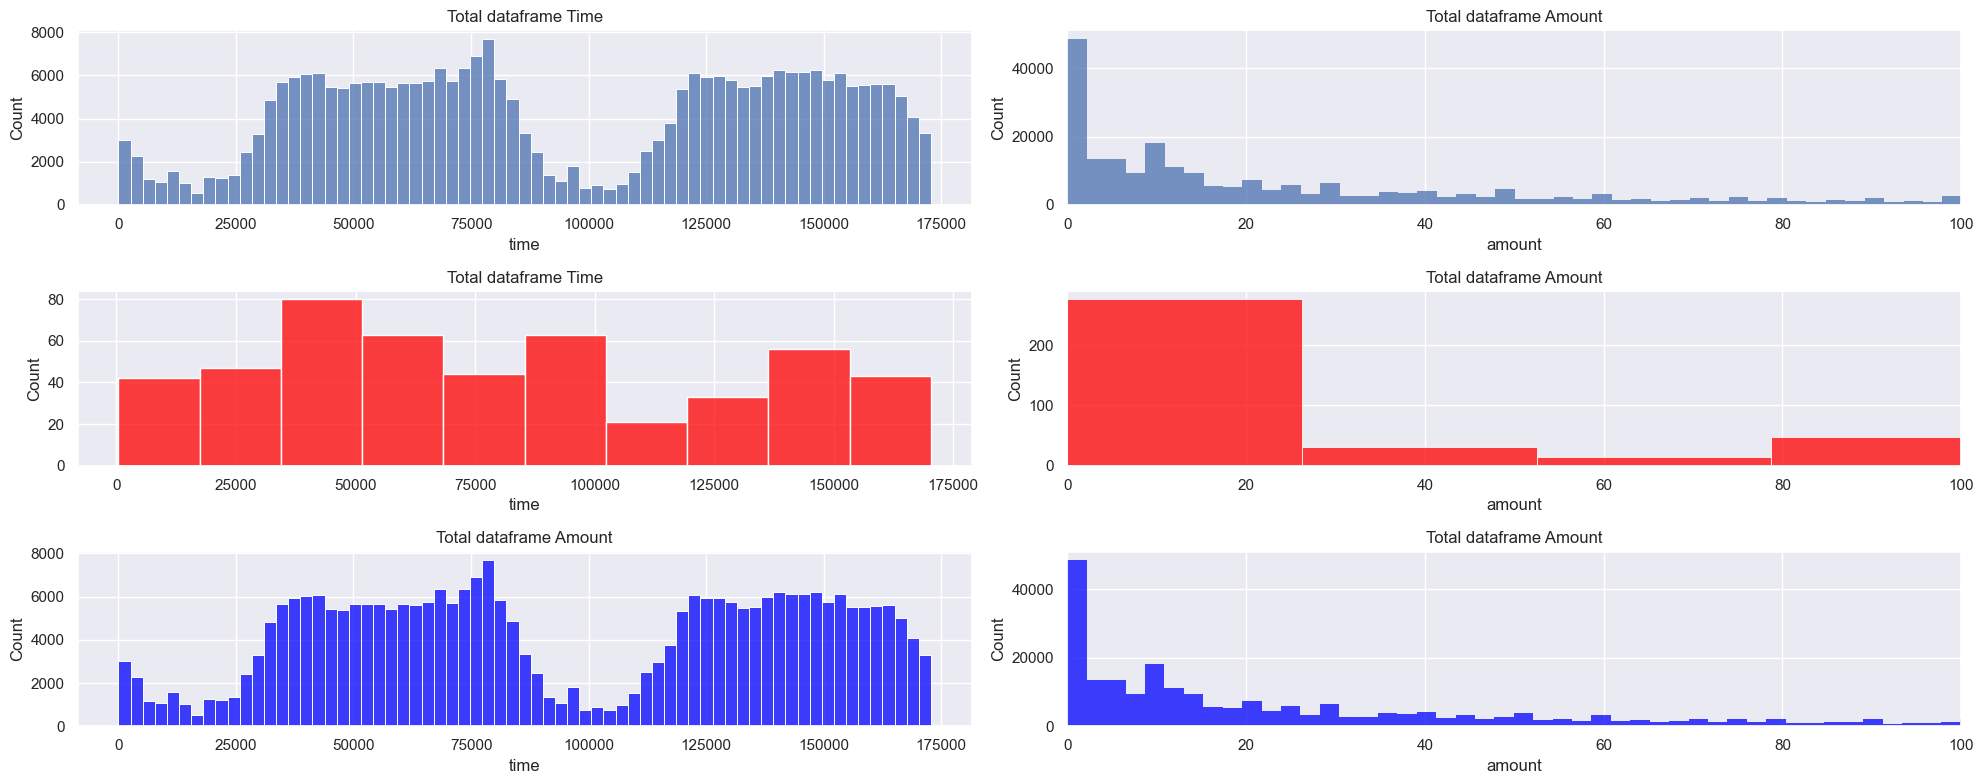

In [11]:
#Subplots contrusctor   
fig, ax = plt.subplots(3,2, figsize=(20,8))
#Time and amount for Frauds Series.
Val_Time_Fraud = raw_data['time'][raw_data['class'] == 1]
Val_Amount_Fraud = raw_data['amount'][raw_data['class'] == 1]
    
#Time and amount for nonFrauds Series.
Val_Time_nFraud = raw_data['time'][raw_data['class'] == 0]
Val_Amount_nFraud = raw_data['amount'][raw_data['class'] == 0]
    
#Total data Hisplots
sns.histplot(data=raw_data, x='time', ax=ax[0,0])
ax[0,0].set_title('Total dataframe Time')

sns.histplot(data=raw_data, x='amount', ax=ax[0,1])
ax[0,1].set_title('Total dataframe Amount')
ax[0,1].set_xlim(0,100)
#Fraud data Hisplots
sns.histplot(Val_Time_Fraud, ax=ax[1,0], color='Red')
ax[1,0].set_title('Total dataframe Time')

sns.histplot(Val_Amount_Fraud, ax=ax[1,1], color='Red')
ax[1,1].set_title('Total dataframe Amount')
ax[1,1].set_xlim(0,100)
    
#Non Fraud data Hisplots
sns.histplot(Val_Time_nFraud, ax=ax[2,0], color='Blue')
ax[2,0].set_title('Total dataframe Amount')

sns.histplot(Val_Amount_nFraud, ax=ax[2,1], color='Blue')
ax[2,1].set_title('Total dataframe Amount')
ax[2,1].set_xlim(0,100)
    
plt.tight_layout()  #To adjust Subplots
plt.show()


### Visualizing the fraudlent transactions

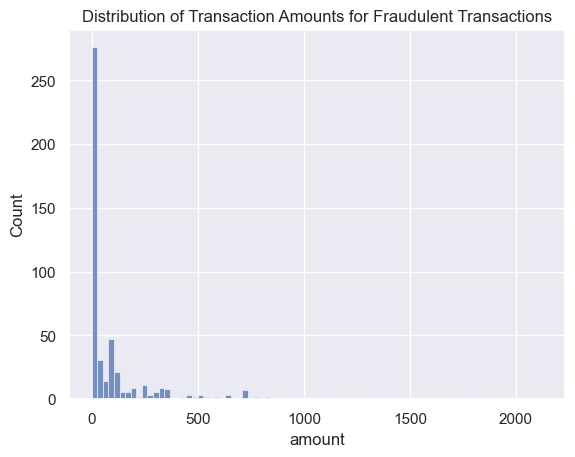

In [25]:
sns.histplot(x=raw_data['amount'][raw_data['class']==1])
plt.title("Distribution of Transaction Amounts for Fraudulent Transactions")
plt.show()

In [13]:
temp = raw_data["class"].value_counts()
df = pd.DataFrame({'class': temp.index,'values': temp.values})

trace = go.Bar(
    x = df['class'],y = df['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Blue"),
    text=df['values']
)
data = [trace]
layout = dict(title = 'Credit Card Fraud Class - data unbalance (Not fraud = 0,Fraud = 1)',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

#### Only 492 (or 0.172%) of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable Class.

## Data Exploration with Time and Amount

#### Transaction in Time

In [14]:
class_0 = raw_data.loc[raw_data['class'] == 0]["time"]
class_1 = raw_data.loc[raw_data['class'] == 1]["time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='time [s]'))
iplot(fig, filename='dist_only')

Let's look into more details to the time distribution of both classes transaction, as well as to aggregated values of transaction count and amount, per hour. We assume (based on observation of the time distribution of transactions) that the time unit is second.

In [15]:
raw_data['hour'] = raw_data['time'].apply(lambda x: np.floor(x / 3600))

tmp = raw_data.groupby(['hour', 'class'])['amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.00,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.00,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.00,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.00,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.00,4002.88,1555,106989.39,68.803466,17.900,45355.430437
...,...,...,...,...,...,...,...,...,...
89,45.0,1,12.31,39.98,2,52.29,26.145000,26.145,382.814450
90,46.0,0,0.00,25691.16,6458,449369.58,69.583397,15.000,132269.354973
91,46.0,1,0.00,634.30,6,1433.23,238.871667,194.490,67185.062017
92,47.0,0,0.00,10199.44,4852,333212.69,68.675328,14.000,56123.940988


#### Transaction Amount

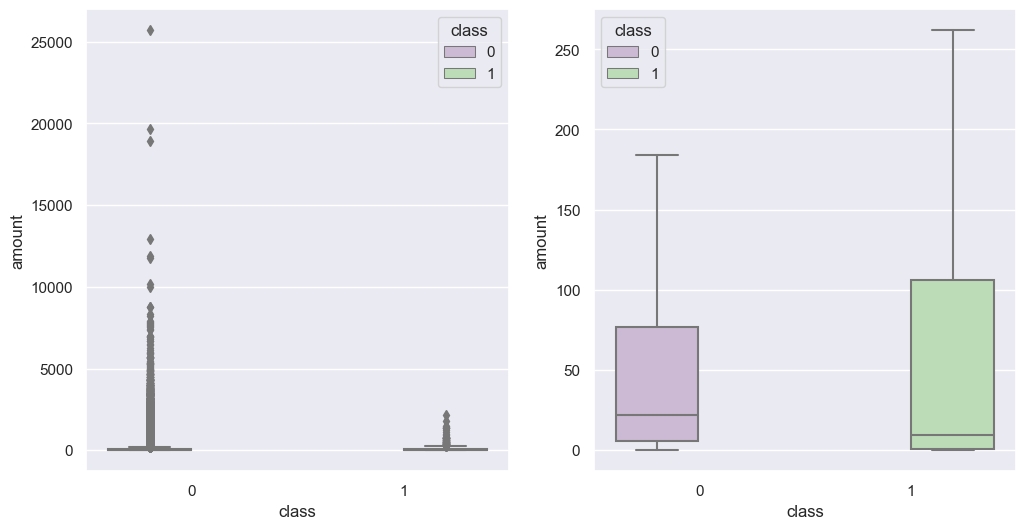

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="class", y="amount", hue="class",data=raw_data, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="class", y="amount", hue="class",data=raw_data, palette="PRGn",showfliers=False)
plt.show();

In [18]:
tmp = raw_data[['amount','class']].copy()
class_0 = tmp.loc[tmp['class'] == 0]['amount']
class_1 = tmp.loc[tmp['class'] == 1]['amount']
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: amount, dtype: float64

In [17]:
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: amount, dtype: float64

In [19]:
fraud = raw_data.loc[raw_data['class'] == 1]

trace = go.Scatter(
    x = fraud['time'],y = fraud['amount'],
    name="amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['amount'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'time [s]', showticklabels=True), 
          yaxis = dict(title = 'amount'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='fraud-amount')

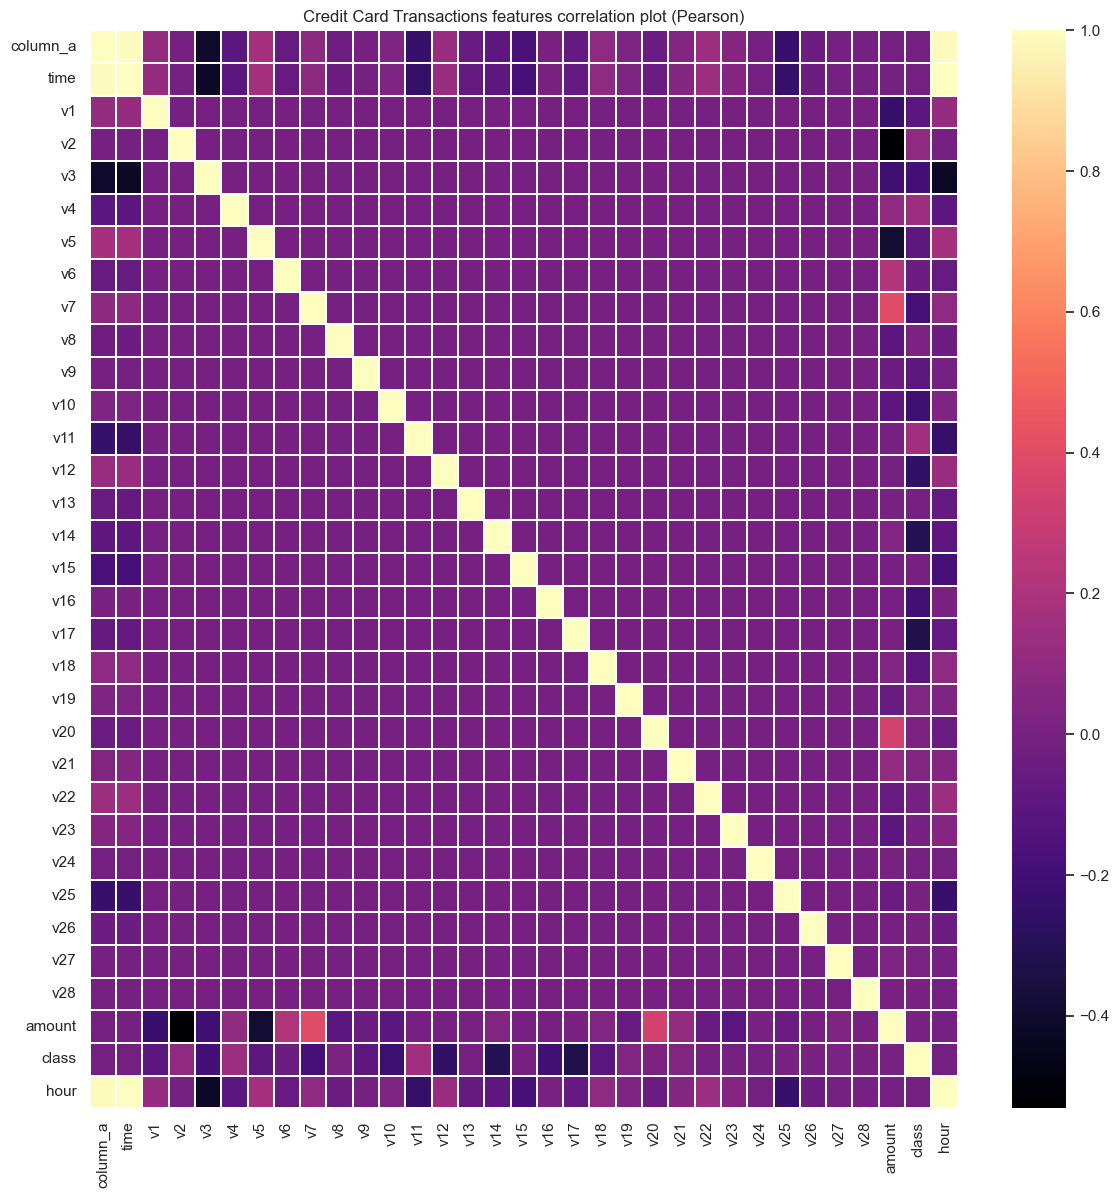

In [20]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = raw_data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="magma")
plt.show()

As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

#### Direct correlated values: {V20;Amount} and {V7;Amount}.

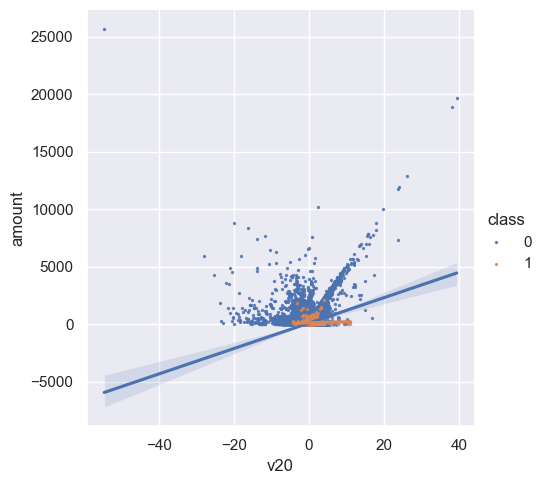

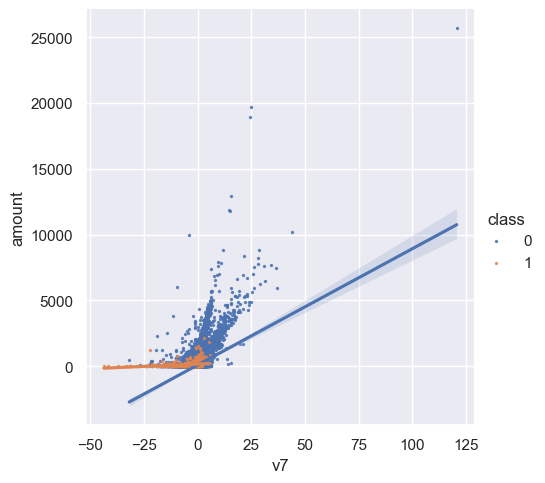

In [21]:
s = sns.lmplot(x='v20', y='amount',data=raw_data, hue='class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='v7', y='amount',data=raw_data, hue='class', fit_reg=True,scatter_kws={'s':2})
plt.show()

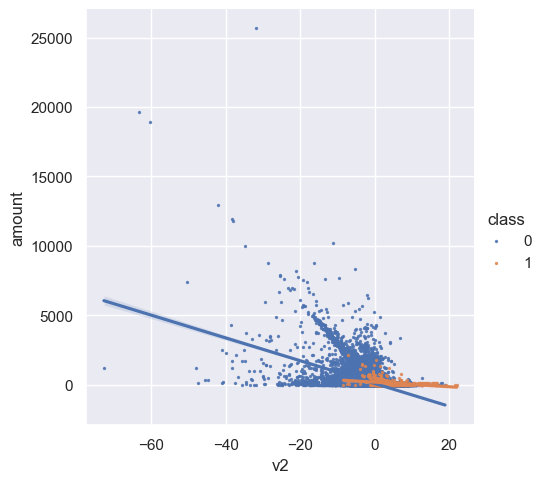

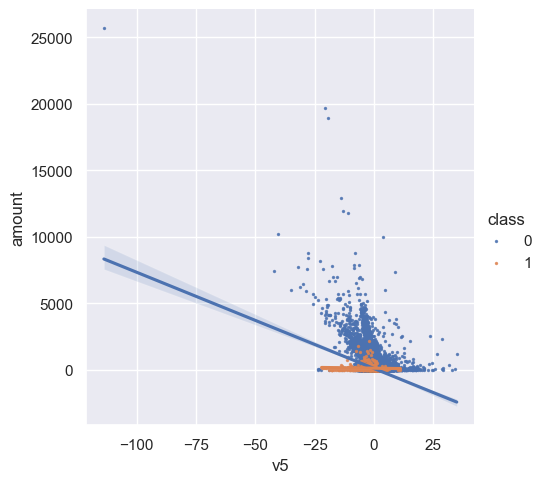

In [21]:
s = sns.lmplot(x='v2', y='amount',data=raw_data, hue='class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='v5', y='amount',data=raw_data, hue='class', fit_reg=True,scatter_kws={'s':2})
plt.show()

Direct Correlation- Two couples of features are correlated (the regression lines for Class = 0 have a positive slope, whilst the regression line for Class = 1 have a smaller positive slope).

Indirect Correlation- Two couples of features are inverse correlated (the regression lines for Class = 0 have a negative slope while the regression lines for Class = 1 have a very small negative slope).

## Predictive Models

In [22]:
target = 'class'
predictors = ['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',\
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19',\
       'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28',\
       'amount']
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split
RANDOM_STATE = 2018


In [23]:
train_df, test_df = train_test_split(raw_data, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(raw_data, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

### Logistic Regression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy: 0.9989466661985184
Predicted      0   1
Actual              
0          56835  27
1             33  67


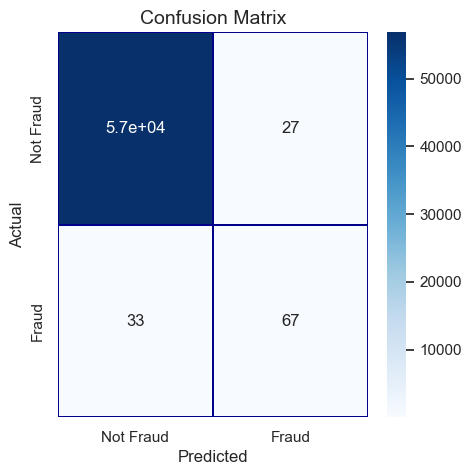

In [62]:
# Create and train the logistic regression model

clf = LogisticRegression()
clf.fit(train_df[predictors], train_df[target].values)

# Make predictions on the validation data
preds = clf.predict(valid_df[predictors])

# Calculate the accuracy 
accuracy = accuracy_score(valid_df[target].values, preds)


# Print the accuracy and F1 score
print("Accuracy:", accuracy)


# Calculate the confusion matrix
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
print(cm)
# Plot the confusion matrix
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

### KNN 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



[[56862     0]
 [   92     8]]
Accuracy: 0.9983848881710614


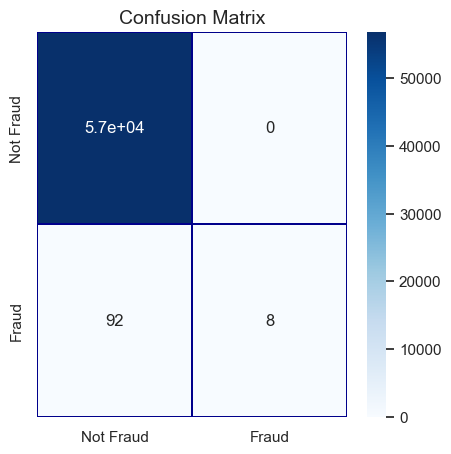

In [63]:

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_df[predictors], train_df[target].values)

# Make predictions on the validation data
preds = knn.predict(valid_df[predictors])

# Calculate the accuracy,
accuracy = accuracy_score(np.array(valid_df[target].values), preds)
cm = confusion_matrix(valid_df[target].values, preds)
print(cm)
# Print the accuracy, F1 score, and confusion matrix
print("Accuracy:", accuracy)
# Plot the confusion matrix
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()


### SVC

Accuracy: 0.9982444436641972
[[56862     0]
 [  100     0]]


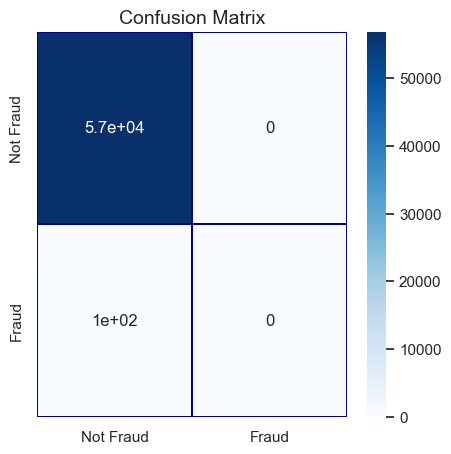

In [65]:
clf = SVC()
clf.fit(train_df[predictors], train_df[target].values)

# Make predictions on the validation data
preds = clf.predict(valid_df[predictors])

# Calculate the accuracy 
accuracy = accuracy_score(valid_df[target].values, preds)


# Print the accuracy and F1 score
print("Accuracy:", accuracy)

# Calculate the confusion matrix
cm = confusion_matrix(valid_df[target].values, preds)
print(cm)
# Plot the confusion matrix
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

### Naïve Bayes

Accuracy: 0.9929777746567887
Predicted      0    1
Actual               
0          56496  366
1             34   66


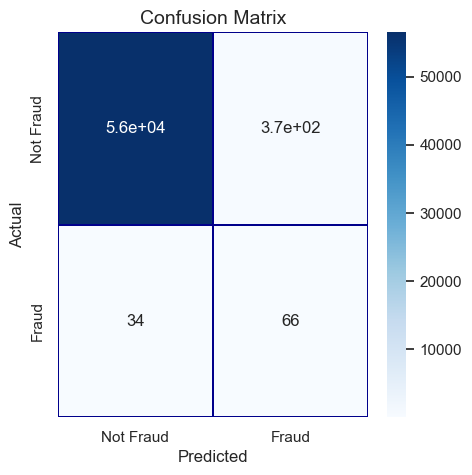

In [67]:


# Create and train the Naive Bayes model
clf = GaussianNB()
clf.fit(train_df[predictors], train_df[target].values)

# Make predictions on the validation data
preds = clf.predict(valid_df[predictors])

# Calculate the accuracy 
accuracy = accuracy_score(valid_df[target].values, preds)


# Print the accuracy and F1 score
print("Accuracy:", accuracy)


# Calculate the confusion matrix
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
print(cm)
# Plot the confusion matrix
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

### Decission Tree

Accuracy: 0.9992451107756047
Predicted      0   1
Actual              
0          56843  19
1             24  76


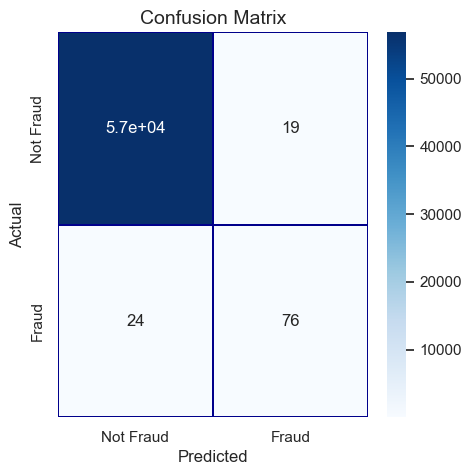

In [68]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(train_df[predictors], train_df[target].values)

# Make predictions on the validation data
preds = clf.predict(valid_df[predictors])

# Calculate the accuracy and F1 score of the model
accuracy = accuracy_score(valid_df[target].values, preds)


# Print the accuracy and F1 score
print("Accuracy:", accuracy)


# Calculate the confusion matrix
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
print(cm)
# Plot the confusion matrix
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

## Comparison of Models

In [69]:
models = {
    "Logistic Regression": {"accuracy": 0.9989466661985184, "confusion_matrix": [[56835, 27], [33, 67]]},
    "KNN": {"accuracy": 0.9983848881710614, "confusion_matrix": [[56862, 0], [92, 8]]},
    "SVC": {"accuracy": 0.9982444436641972, "confusion_matrix": [[56862, 0], [100, 0]]},
    "Naive Bayes": {"accuracy": 0.9929777746567887, "confusion_matrix": [[56496, 366], [34, 66]]},
    "Decision Tree": {"accuracy": 0.9992451107756047, "confusion_matrix": [[56843, 19], [24, 76]]}
}

### Accuracy

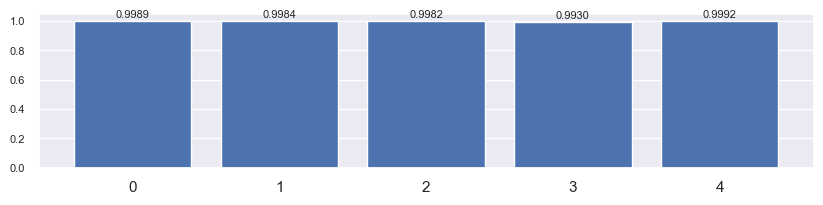

In [82]:
x = np.arange(len(models.keys()))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 2))
ax.bar(x, [model["accuracy"] for model in models.values()])

# Add the value labels
for i in range(len(x)):
    y = [model["accuracy"] for model in models.values()][i]
    ax.text(i, y + 0.01, f"{y:.4f}", ha='center', va='bottom', fontsize=8)

# Shrink the y-axis labels
ax.tick_params(axis='y', labelsize=8)

# Show the plot
plt.show()

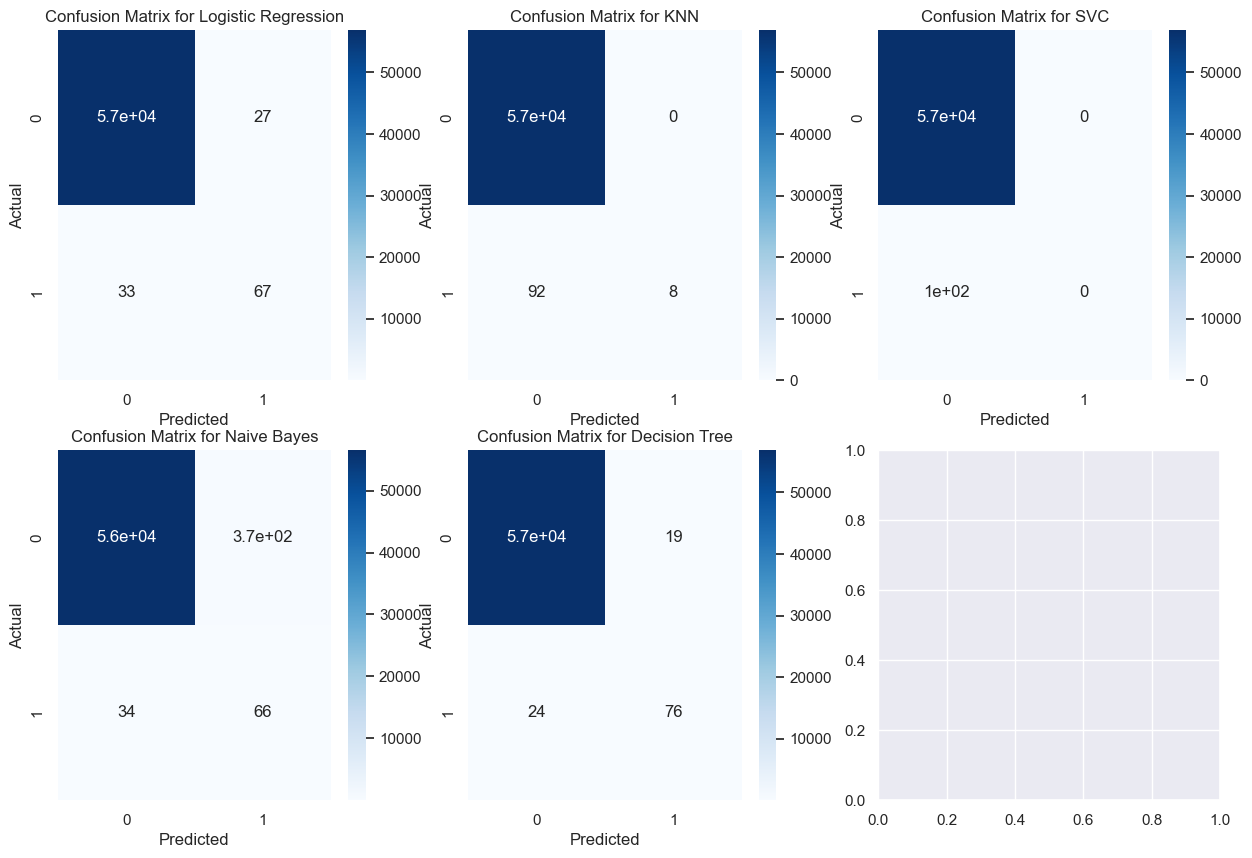

In [71]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, (model_name, model) in enumerate(models.items()):
    ax = axes[i // 3, i % 3]
    cm = np.array(model["confusion_matrix"])
    sns.heatmap(cm, annot=True, ax=ax, cmap="Blues")
    ax.set_title(f"Confusion Matrix for {model_name}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.show()

## Conclusion

These plots show that the Decision Tree model has the highest accuracy, followed by the Logistic Regression model. The Naive Bayes model has the lowest accuracy.

The confusion matrices show that all of the models are able to correctly predict the majority of the negative cases (i.e., not fraud). However, the Decision Tree model is better at predicting the positive cases (i.e., fraud).

Overall, the Decision Tree model is the best model for predicting fraud in this dataset. but due to the high imabalnce in the dataset this accuracy is not reliable, so as a next step i need to balance the dataset and then execute the modelling

# Modelling after balancing the dataset


pip install pydotplus

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


from collections import Counter
from IPython.display import Image  
import pydotplus
import xgboost as xgb
from pydotplus import graph_from_dot_data
sns.set()
%matplotlib inline


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-pac

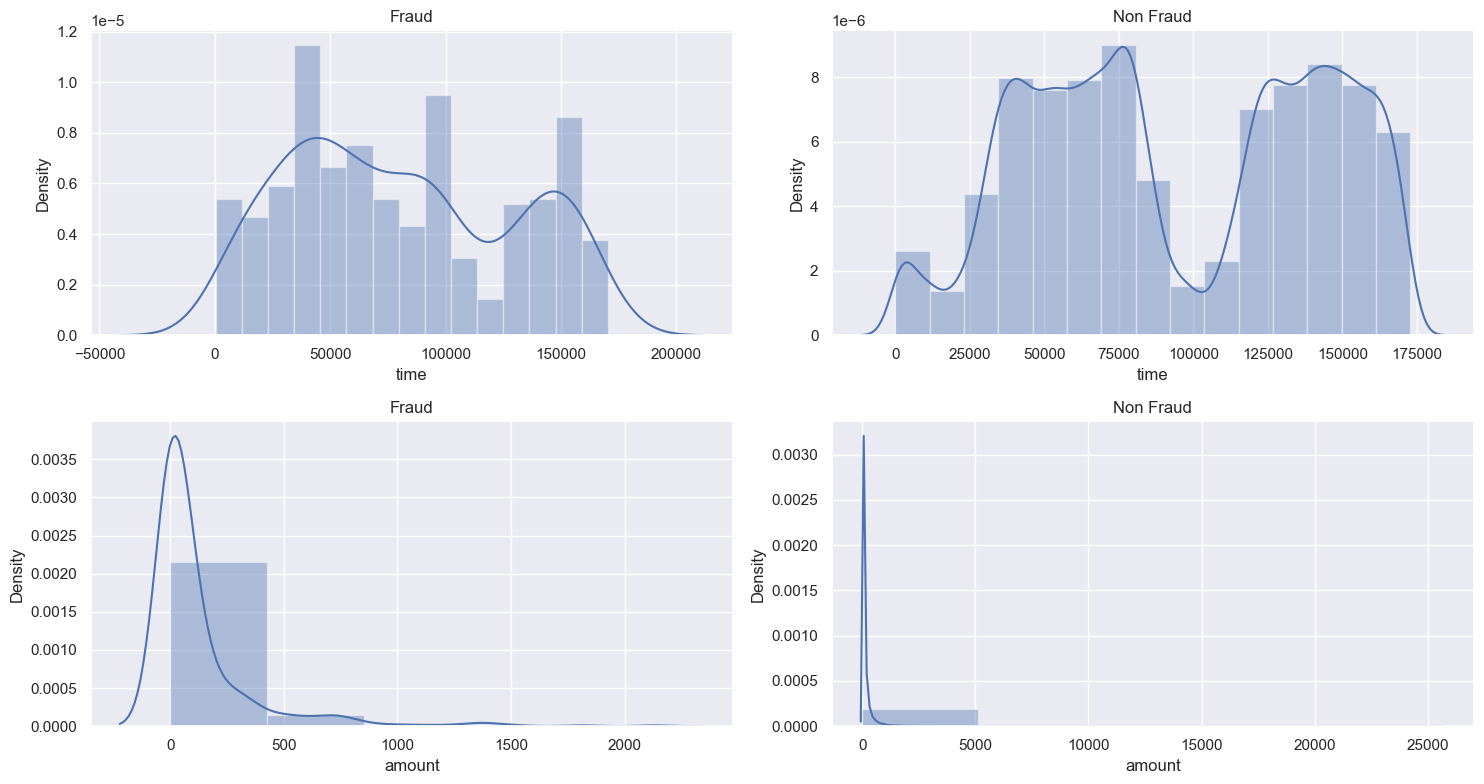

In [11]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,8))
sns.distplot(raw_data['time'][raw_data['class'] == 1], bins=15, ax=ax1)
sns.distplot(raw_data['time'][raw_data['class'] == 0], bins=15, ax=ax2)

sns.distplot(raw_data['amount'][raw_data['class'] == 1], bins=5, ax=ax3)
sns.distplot(raw_data['amount'][raw_data['class'] == 0], bins=5, ax=ax4)

ax1.set_title('Fraud')
ax2.set_title('Non Fraud')
ax3.set_title('Fraud')
ax4.set_title('Non Fraud')
plt.tight_layout()
plt.show()

We already know this dataset is not balanced. Let's take a look at this balance before we fix it. We also need to:

Transform the Time and Amount columns;
Split the dataset into train and test;

We can see a disproportionate ratio of observations in each class, which is not good for machine learning models' accuracy.

But before we balance the dataset, let's first transform the Time and Amount columns using the StandardScaler class.

In [5]:
scaler = StandardScaler()

raw_data['std_amount'] = scaler.fit_transform(raw_data['amount'].values.reshape(-1, 1))
raw_data['std_time'] = scaler.fit_transform(raw_data['time'].values.reshape(-1, 1))

raw_data.drop(['amount', 'time'], axis=1, inplace=True)

raw_data.head()

,column_a,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v22,v23,v24,v25,v26,v27,v28,class,std_amount,std_time
0,1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,False,0.244964,-1.996583
1,2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,False,-0.342475,-1.996583
2,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,False,1.160686,-1.996562
3,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,False,0.140534,-1.996562
4,5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,False,-0.073403,-1.996541


In [16]:
#With the values transformed, let's split the dataset using train_test_split.

X = raw_data.drop('class', axis=1)
y = raw_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Now let's use the RandomUnderSampler class to balance X_train and y_train. We'll then see the result of this.

False    0.5
True     0.5
Name: class, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



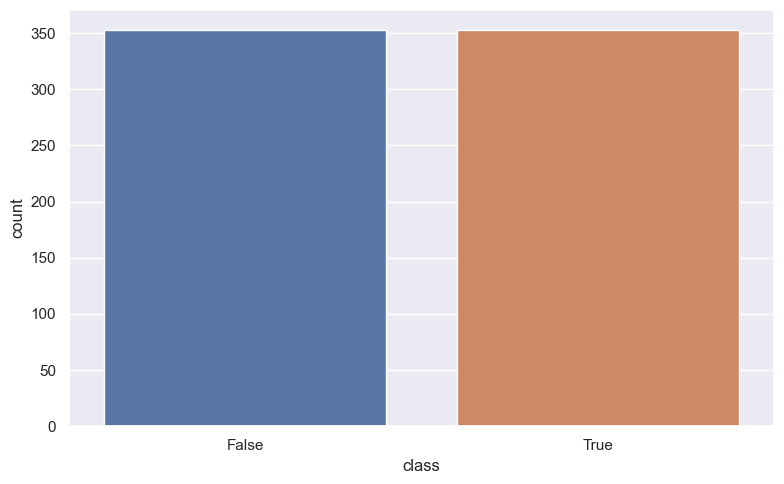

In [34]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

print(pd.Series(y_rus).value_counts(normalize=True))

fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(y_rus)

plt.tight_layout()
plt.show()

We'll also use the RandomOverSampler class to balance the data. We'll train models with both balancement methods and compare the results.

False    0.5
True     0.5
Name: class, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



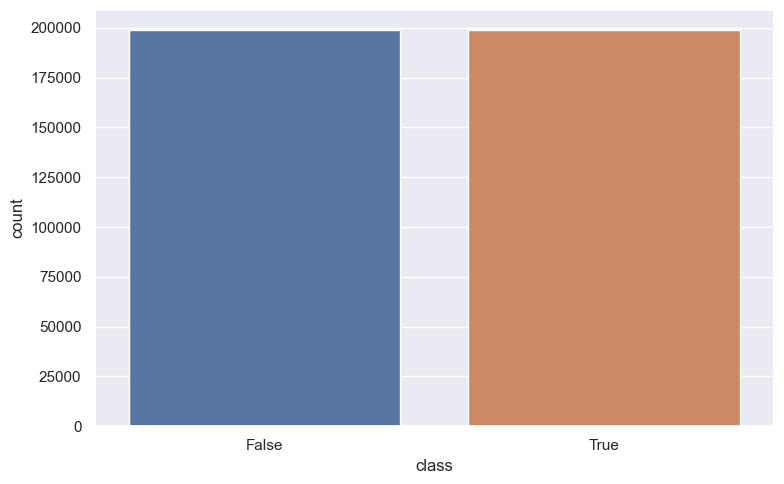

In [39]:

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)

print(pd.Series(y_ros).value_counts(normalize=True))

fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(y_ros)

plt.tight_layout()
plt.show()

## Logistic Regression

##### Under Sampler

              precision    recall  f1-score   support

       False       1.00      0.95      0.97     85304
        True       0.03      0.87      0.05       139

    accuracy                           0.95     85443
   macro avg       0.51      0.91      0.51     85443
weighted avg       1.00      0.95      0.97     85443



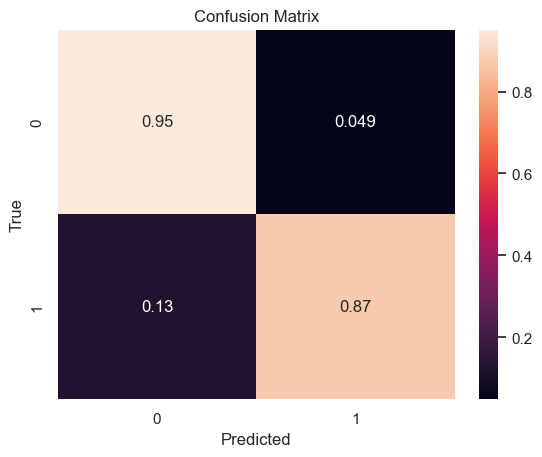

ROC AUC Score: 0.9108


In [40]:
log_reg_under = LogisticRegression()

log_reg_under.fit(X_rus, y_rus)

y_pred_log_under = log_reg_under.predict(X_test)


def report(pred):
    print(classification_report(y_test, pred))
    fig, ax = plt.subplots()
    sns.heatmap(confusion_matrix(y_test, pred, normalize='true'), annot=True, ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')

    plt.show()

    print(f'ROC AUC Score: {round(roc_auc_score(y_test, pred), 4)}')

report(y_pred_log_under)

##### OverSampler

              precision    recall  f1-score   support

       False       1.00      0.97      0.99     85304
        True       0.05      0.88      0.09       139

    accuracy                           0.97     85443
   macro avg       0.52      0.92      0.54     85443
weighted avg       1.00      0.97      0.98     85443



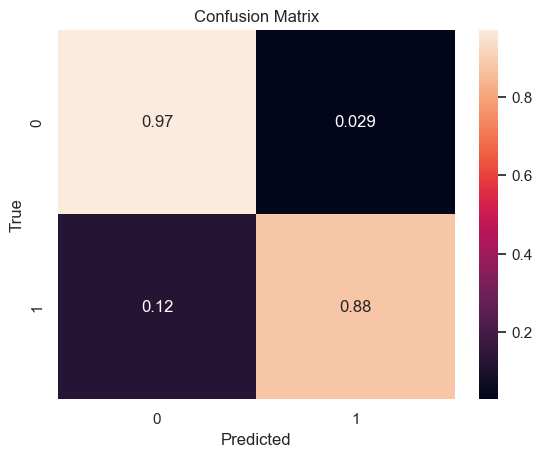

ROC AUC Score: 0.9243


In [41]:

log_reg_over = LogisticRegression()

log_reg_over.fit(X_ros, y_ros)

y_pred_log_over = log_reg_over.predict(X_test)

report(y_pred_log_over)

## Decision Trees

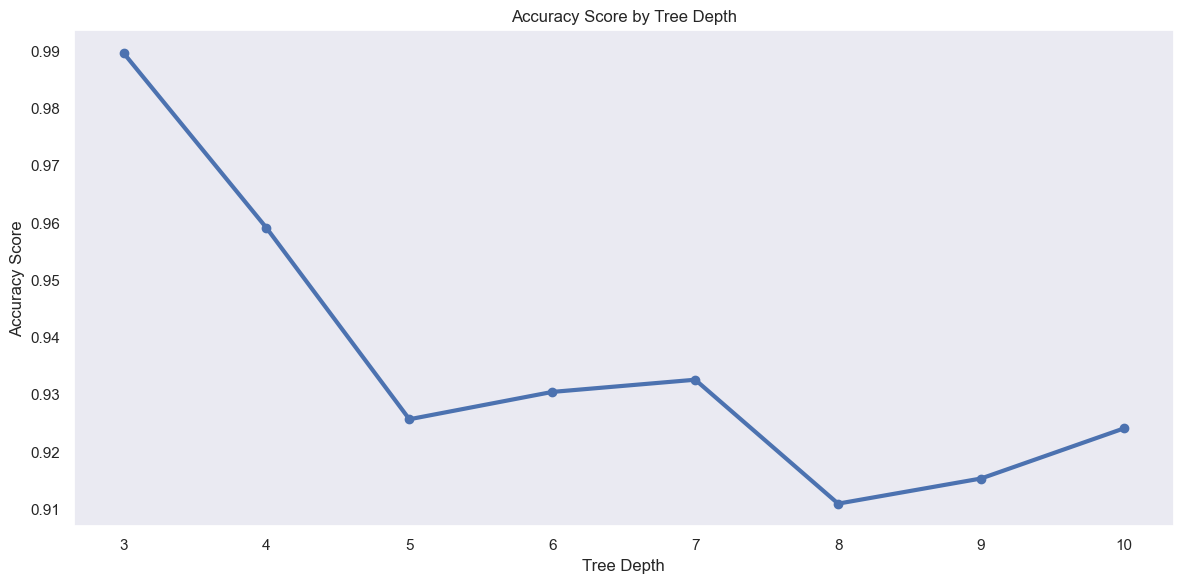

The best accuracy was 0.9897 with depth=3.


In [42]:
n = 11
acc_tree = np.zeros((n-3))

for i in range(3, n):

    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i)

    tree.fit(X_rus, y_rus)

    y_pred_tree = tree.predict(X_test)

    acc_tree[i-3] = accuracy_score(y_test, y_pred_tree)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(range(3, n), acc_tree, linewidth=3, marker='o')
ax.set_title('Accuracy Score by Tree Depth')
ax.set_ylabel('Accuracy Score')
ax.set_xlabel('Tree Depth')
ax.grid(False)

plt.tight_layout()
plt.show()

best_depth = acc_tree.argmax()+3
print(f'The best accuracy was {round(acc_tree.max(), 4)} with depth={best_depth}.') 

### Training the model with the underbalanced data:

              precision    recall  f1-score   support

       False       1.00      0.99      0.99     85304
        True       0.12      0.83      0.21       139

    accuracy                           0.99     85443
   macro avg       0.56      0.91      0.60     85443
weighted avg       1.00      0.99      0.99     85443



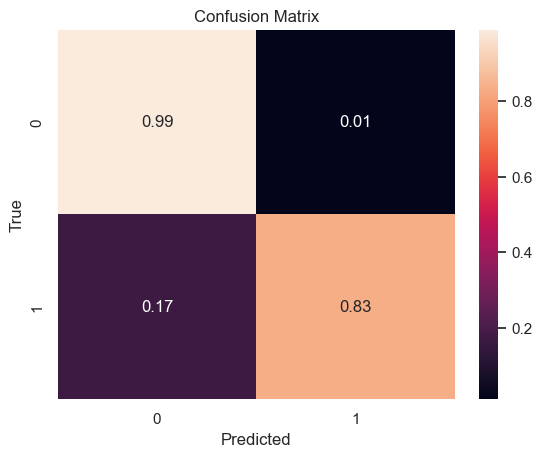

ROC AUC Score: 0.9122


In [43]:
tree_under = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)

tree_under.fit(X_rus, y_rus)

y_pred_tree_under = tree_under.predict(X_test)

report(y_pred_tree_under)
     

### Training the model with the overbalanced data.

              precision    recall  f1-score   support

       False       1.00      0.98      0.99     85304
        True       0.06      0.88      0.11       139

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



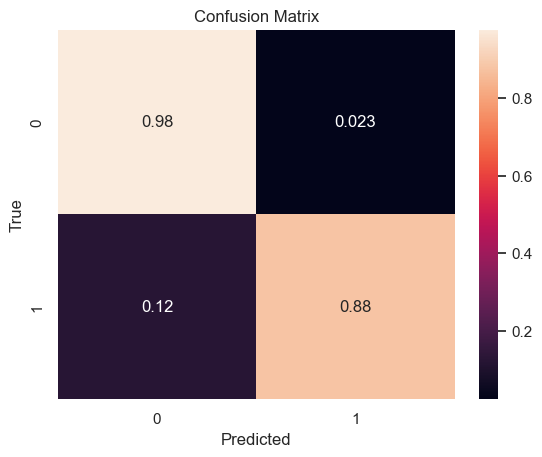

ROC AUC Score: 0.9273


In [44]:
tree_over = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)

tree_over.fit(X_ros, y_ros)

y_pred_tree_over = tree_over.predict(X_test)

report(y_pred_tree_over)

### K-nearest Neighbors

#### Training the model with the underbalanced data:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



              precision    recall  f1-score   support

       False       1.00      0.83      0.91     85304
        True       0.00      0.42      0.01       139

    accuracy                           0.83     85443
   macro avg       0.50      0.62      0.46     85443
weighted avg       1.00      0.83      0.91     85443



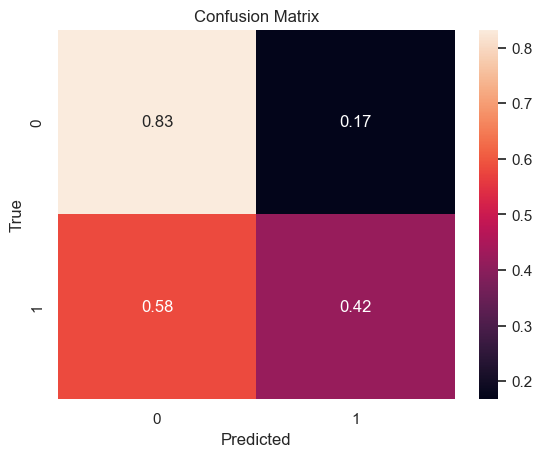

ROC AUC Score: 0.6248


In [46]:
knn_under = KNeighborsClassifier(n_neighbors=best_k)

knn_under.fit(X_rus, y_rus)

y_pred_knn_under = knn_under.predict(X_test)

report(y_pred_knn_under)

#### Training the model with the overbalanced data:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



              precision    recall  f1-score   support

       False       1.00      1.00      1.00     85304
        True       0.73      0.24      0.36       139

    accuracy                           1.00     85443
   macro avg       0.87      0.62      0.68     85443
weighted avg       1.00      1.00      1.00     85443



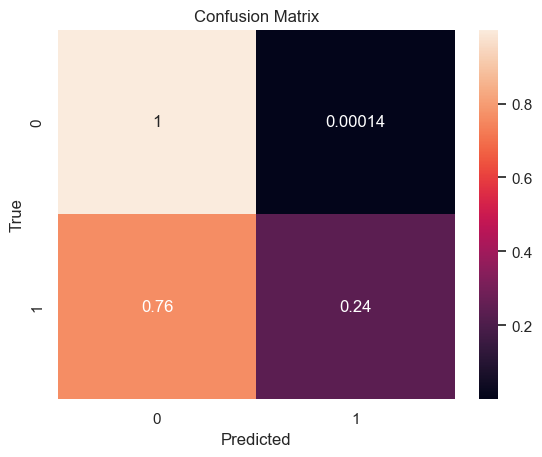

ROC AUC Score: 0.6186


In [47]:
knn_over = KNeighborsClassifier(n_neighbors=best_k)

knn_over.fit(X_ros, y_ros)

y_pred_knn_over = knn_over.predict(X_test)

report(y_pred_knn_over)

## XGBoost

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     85304
        True       0.89      0.76      0.82       139

    accuracy                           1.00     85443
   macro avg       0.95      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443



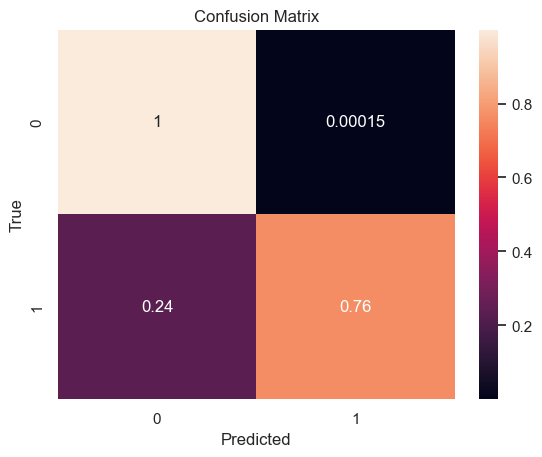

ROC AUC Score: 0.8812


In [48]:
xgb = XGBClassifier()

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

report(y_pred_xgb)
     

###  XGboost scaled

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     85304
        True       0.87      0.81      0.84       139

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443



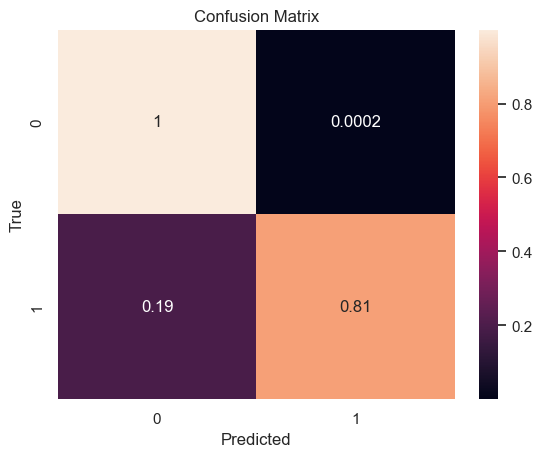

ROC AUC Score: 0.9028


In [49]:
# Caculating the ratio
counter = Counter(y_train)
estimate = counter[0] / counter[1]

# Implementing the model
xgb = XGBClassifier(scale_pos_weight=estimate)

xgb.fit(X_train, y_train)

y_pred_xgb_scaled = xgb.predict(X_test)

report(y_pred_xgb_scaled)

## Comparing the Models

In [50]:
summary = pd.DataFrame(data={
'labels': ['Accuracy', 'Precision', 'Recall', 'F1_score', 'roc_auc'],
'log_reg_under': [accuracy_score(y_test, y_pred_log_under), precision_score(y_test, y_pred_log_under), recall_score(y_test, y_pred_log_under), f1_score(y_test, y_pred_log_under), roc_auc_score(y_test, y_pred_log_under)],
'log_reg_over': [accuracy_score(y_test, y_pred_log_over), precision_score(y_test, y_pred_log_over), recall_score(y_test, y_pred_log_over), f1_score(y_test, y_pred_log_over), roc_auc_score(y_test, y_pred_log_over)],
'decision_trees_under': [accuracy_score(y_test, y_pred_tree_under), precision_score(y_test, y_pred_tree_under), recall_score(y_test, y_pred_tree_under), f1_score(y_test, y_pred_tree_under), roc_auc_score(y_test, y_pred_tree_under)],
'decision_trees_over': [accuracy_score(y_test, y_pred_tree_over), precision_score(y_test, y_pred_tree_over), recall_score(y_test, y_pred_tree_over), f1_score(y_test, y_pred_tree_over), roc_auc_score(y_test, y_pred_tree_over)],
'knn_under': [accuracy_score(y_test, y_pred_knn_under), precision_score(y_test, y_pred_knn_under), recall_score(y_test, y_pred_knn_under), f1_score(y_test, y_pred_knn_under), roc_auc_score(y_test, y_pred_knn_under)],
'knn_over': [accuracy_score(y_test, y_pred_knn_over), precision_score(y_test, y_pred_knn_over), recall_score(y_test, y_pred_knn_over), f1_score(y_test, y_pred_knn_over), roc_auc_score(y_test, y_pred_knn_over)],
'XGBoost': [accuracy_score(y_test, y_pred_xgb), precision_score(y_test, y_pred_xgb), recall_score(y_test, y_pred_xgb), f1_score(y_test, y_pred_xgb), roc_auc_score(y_test, y_pred_xgb)],
'XGBoost_scaled': [accuracy_score(y_test, y_pred_xgb_scaled), precision_score(y_test, y_pred_xgb_scaled), recall_score(y_test, y_pred_xgb_scaled), f1_score(y_test, y_pred_xgb_scaled), roc_auc_score(y_test, y_pred_xgb_scaled)]
}).set_index('labels')
summary.index.name = None

summary

,log_reg_under,log_reg_over,decision_trees_under,decision_trees_over,knn_under,knn_over,XGBoost,XGBoost_scaled
Accuracy,0.950880,0.970776,0.989712,0.976827,0.831701,0.998619,0.999462,0.999485
Precision,0.028140,0.046887,0.119342,0.058513,0.004040,0.733333,0.890756,0.868217
Recall,0.870504,0.877698,0.834532,0.877698,0.417266,0.237410,0.762590,0.805755
F1_score,0.054517,0.089019,0.208821,0.109712,0.008002,0.358696,0.821705,0.835821
roc_auc,0.910757,0.924313,0.912249,0.927343,0.624821,0.618635,0.881219,0.902778


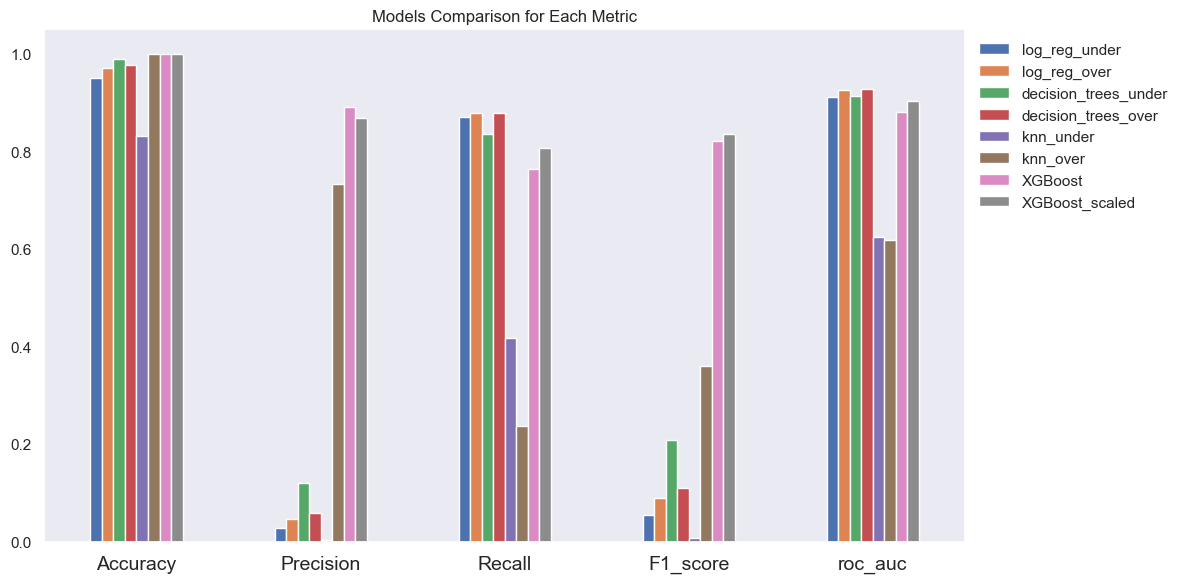

In [51]:
fig, ax = plt.subplots(figsize=(12, 6))
summary.plot.bar(ax=ax)
ax.legend(bbox_to_anchor=(1, 1), frameon=False)
ax.grid(False)
ax.set_title('Models Comparison for Each Metric')

plt.xticks(rotation=0, fontsize=14)
plt.tight_layout()
plt.show()

# Using GANs to generate new data

In [40]:
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, Concatenate
from tensorflow.keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D, LeakyReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.initializers import RandomNormal
import tensorflow.keras.backend as K
from sklearn.utils import shuffle

In [39]:
X = raw_data.drop('class', axis=1)
y = raw_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)

In [42]:
class cGAN():
    def __init__(self):
        self.latent_dim = 32
        self.out_shape = 29
        self.num_classes = 2
        self.clip_value = 0.01
        optimizer = Adam(0.0002, 0.5)
        #optimizer = RMSprop(lr=0.00005)

        # build discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss=['binary_crossentropy'],
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        # build generator
        self.generator = self.build_generator()

        # generating new data samples
        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,))
        gen_samples = self.generator([noise, label])

        self.discriminator.trainable = False

        # passing gen samples through disc. 
        valid = self.discriminator([gen_samples, label])

        # combining both models
        self.combined = Model([noise, label], valid)
        self.combined.compile(loss=['binary_crossentropy'],
                              optimizer=optimizer,
                             metrics=['accuracy'])
        self.combined.summary()

    def wasserstein_loss(self, y_true, y_pred):
        return K.mean(y_true * y_pred)

    def build_generator(self):
        init = RandomNormal(mean=0.0, stddev=0.02)
        model = Sequential()

        model.add(Dense(128, input_dim=self.latent_dim))
        #model.add(Dropout(0.2))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(256))
        #model.add(Dropout(0.2))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(512))
        #model.add(Dropout(0.2))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(self.out_shape, activation='tanh'))
        model.summary()
        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,), dtype='int32')
        label_embedding = Flatten()(Embedding(self.num_classes, self.latent_dim)(label))
        
        model_input = multiply([noise, label_embedding])
        gen_sample = model(model_input)

        return Model([noise, label], gen_sample, name="Generator")

    
    def build_discriminator(self):
        init = RandomNormal(mean=0.0, stddev=0.02)
        model = Sequential()

        model.add(Dense(512, input_dim=self.out_shape, kernel_initializer=init))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Dense(256, kernel_initializer=init))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        
        model.add(Dense(128, kernel_initializer=init))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        
        gen_sample = Input(shape=(self.out_shape,))
        label = Input(shape=(1,), dtype='int32')
        label_embedding = Flatten()(Embedding(self.num_classes, self.out_shape)(label))

        model_input = multiply([gen_sample, label_embedding])
        validity = model(model_input)

        return Model(inputs=[gen_sample, label], outputs=validity, name="Discriminator")


    def train(self, X_train, y_train, pos_index, neg_index, epochs, batch_size=32, sample_interval=50):

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):
            
            #  Train Discriminator with 8 sample from postivite class and rest with negative class
            idx1 = np.random.choice(pos_index, 8)
            idx0 = np.random.choice(neg_index, batch_size-8)
            idx = np.concatenate((idx1, idx0))
            samples, labels = X_train[idx], y_train[idx]
            samples, labels = shuffle(samples, labels)
            # Sample noise as generator input
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Generate a half batch of new images
            gen_samples = self.generator.predict([noise, labels])
             # label smoothing
            if epoch < epochs//1.5:
                valid_smooth = (valid+0.1)-(np.random.random(valid.shape)*0.1)
                fake_smooth = (fake-0.1)+(np.random.random(fake.shape)*0.1)
            else:
                valid_smooth = valid 
                fake_smooth = fake
                
            # Train the discriminator
            self.discriminator.trainable = True
            d_loss_real = self.discriminator.train_on_batch([samples, labels], valid_smooth)
            d_loss_fake = self.discriminator.train_on_batch([gen_samples, labels], fake_smooth)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Train Generator
            # Condition on labels
            self.discriminator.trainable = False
            sampled_labels = np.random.randint(0, 2, batch_size).reshape(-1, 1)
            # Train the generator
            g_loss = self.combined.train_on_batch([noise, sampled_labels], valid)

            # Plot the progress
            if (epoch+1)%sample_interval==0:
                 print (f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}] [G loss: {g_loss}]")

In [43]:
cgan = cGAN()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               15360     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 128)               0

C:\Users\Justin\AppData\Roaming\Python\Python39\site-packages\keras\src\initializers\initializers.py:120: UserWarning:

The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               4224      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 128)               0         
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                     

##  A novel solution to the problem of data imbalance was the application of GANs to augment tabular data. GANs have shown to be successful in producing synthetic data for a range of applications, and this task was a good fit for them because of their capacity to capture intricate relationships between variables. this will be a seperate subject and method of my research in the same subject.